<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)


happiness2015 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2015.csv', low_memory=False)
happiness2016 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2016.csv', low_memory=False)
happiness2017 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2017.csv', low_memory=False)
happiness2018 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)
happiness2019 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2019.csv', low_memory=False)

happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
happiness2015.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 34.6 KB


In [3]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [4]:
happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
# Wstawiam kolumnę RegionCategory:
happiness2015.insert(loc=1, column="RegionCategory", value=0)
happiness2015.head(3)

,Country,RegionCategory,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,0,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,0,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [6]:
# Uogólnienie regionów
Europe = happiness2015['Region'].str.contains("Europe") 
America = happiness2015['Region'].str.contains("America")
Africa  = happiness2015['Region'].str.contains("Africa")
Asia  = happiness2015['Region'].str.contains("Asia")
Australia_NewZealand  = happiness2015['Region'].str.contains("Australia and New Zealand")

# Dodanie kategorii
happiness2015.loc[Europe, 'RegionCategory'] = 'Europe'
happiness2015.loc[America, 'RegionCategory'] = 'Nort_South_Central America'
happiness2015.loc[Africa, 'RegionCategory'] = 'Africa'
happiness2015.loc[Asia, 'RegionCategory'] = 'Asia'
happiness2015.loc[Australia_NewZealand, 'RegionCategory'] = 'Australia_NewZealand'

happiness2015.head()

,Country,RegionCategory,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Europe,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Europe,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Europe,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Europe,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,Nort_South_Central America,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


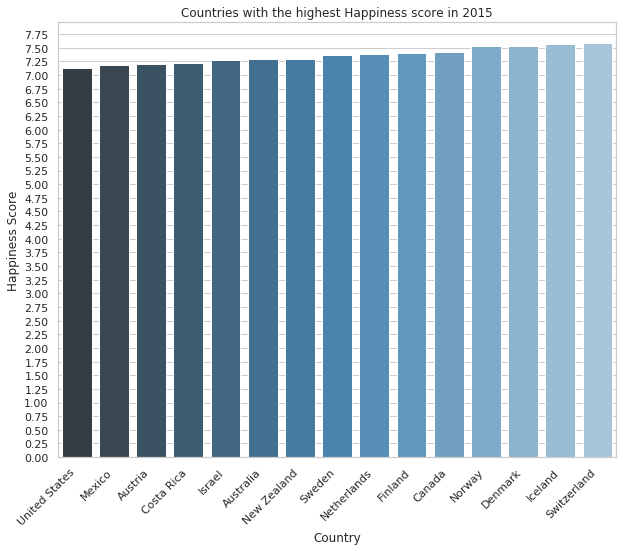

In [7]:
# Countries with the highest Happiness score in 2015
Sortedhappiness2015 = happiness2015.sort_values(by='Happiness Score')
Sortedhappiness2015Greaterthan7 = Sortedhappiness2015['Happiness Score'] >= 7
Sortedhappiness2015Greaterthan7 = Sortedhappiness2015[Sortedhappiness2015Greaterthan7]

x_data= 'Country'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=0.25))

g = sns.barplot(  data=Sortedhappiness2015Greaterthan7, x=x_data,  y='Happiness Score',palette='Blues_d'  )

g.set( xlabel='Country', ylabel='Happiness Score', title='Countries with the highest Happiness score in 2015')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

In [0]:
# OK
class Distribution:
  '''Distrubtion - class where distribution plots are stored'''
  def __init__(self, dataset):
    self.dataset = dataset
    self.binsValues = [10,20,30,35]
    self.colorList = ['dodgerblue', 'red', 'g', 'darkmagenta']
    sns.set(style='whitegrid', color_codes=True)

  def __createHistogram(self, value):
    if self.i != None:
      SetColumnRow = self.axes[self.i,self.j]
      DataRow = value[self.i]
      index = self.i
    else:
      print
      SetColumnRow = self.axes[self.j]
      DataRow = value
      index = 0
    sns.distplot(self.dataset[DataRow], bins=self.binsValues[self.j], hist=True, axlabel=False, label=DataRow, color=self.colorList[index], ax=SetColumnRow )
    SetColumnRow.set(ylabel='Liczba wystąpień', title='bins: {}'.format(self.binsValues[self.j]) )
    SetColumnRow.legend( frameon=True)   

  def addHistMatrix(self, value):
    ''' addHistMatrix - Compare histograms according to bin counts'''
    if isinstance(value, list):
      fig, self.axes = plt.subplots(len(value), 4, figsize=(25, 15))
      self.index = 0
      for self.i in range(len(value)):
          for self.j in range(4):
            self.__createHistogram(value)
            self.index+=1  
    else:
      self.i = None
      fig, self.axes = plt.subplots(1, 4, figsize=(25, 6))
      for self.j in range(4):
        self.__createHistogram(value)
    plt.show()

  def addHist(self, list):
    ''' addHist - Adding histogram'''
    fig, self.axes = plt.subplots(2, 2, figsize=(20, 8))
    self.index = 0
    for i in range(2):
      for j in range(2):
        sns.distplot(self.dataset[list[self.index]], bins=35, hist=True, axlabel=False, label=list[self.index],  color=self.colorList[self.index], ax=self.axes[i,j])
        self.axes[i,j].set( ylabel='liczba wystąpień', title='bins: {}'.format(35))
        self.axes[i,j].legend( frameon=True)
        self.index+=1     
    plt.show()

  def addStackedHist(self, list): 
    ''' addStackedHist - Adding stacked histogram''' 
    fig, self.axes = plt.subplots(1, 2, figsize=(25, 8))
    self.index = 0
    SlicedColsList= list[1:]
    for i in range(2):
      for value in SlicedColsList:
            g = sns.distplot(self.dataset[value], bins=35, hist=True, kde=False, label=value, axlabel=False, color=self.colorList[self.index], ax=self.axes[i])
            g.set(ylabel='Liczba wystąpień', title='bins: {}'.format(35) )
            g.legend( frameon=True)
            g.set_yticks(np.arange(0, 16, step=0.75))
            self.index+=1
      self.index = 0
      SlicedColsList= list[:1]
    plt.show()

  def addDensityDistribution(self, list):
    ''' addDensityDistribution - Adding density distrubution'''
    fig, self.axes = plt.subplots(1, 2, figsize=(25, 8))
    self.index = 0
    SlicedColsList= list[1:]
    for i in range(2):
      for value in SlicedColsList:
        g = sns.kdeplot(self.dataset[value], label=value, shade=True, color=self.colorList[self.index], ax=self.axes[i])
        g.set(ylabel='Liczba wystąpień' )
        g.legend( frameon=True)
        g.set_yticks(np.arange(0, 2, step=0.1))
        self.index+=1 
      self.index = 0
      SlicedColsList= list[:1]
    plt.show()

  def addBoxPlot(self, list):
    ''' addBoxPlot - Adding box plot'''
    fig, self.axes = plt.subplots(1, 3, figsize=(23, 12), sharey=True )
    self.index = 0
    self.Labelindex = 0
    SlicedColsList= list[1:]
    for i in range(3):
        ranks = self.dataset.groupby("Region")[SlicedColsList[self.Labelindex]].mean().sort_values().index
        g = sns.boxplot( x='Region', y=SlicedColsList[self.Labelindex], data=self.dataset, color=self.colorList[self.index], order = ranks, ax=self.axes[i])
        g.set_yticks(np.arange(0, 1.8, step=0.15))
        g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
        self.index+=1
        self.Labelindex+=1
    plt.show()

In [0]:
DistributionObj = Distribution(happiness2015)

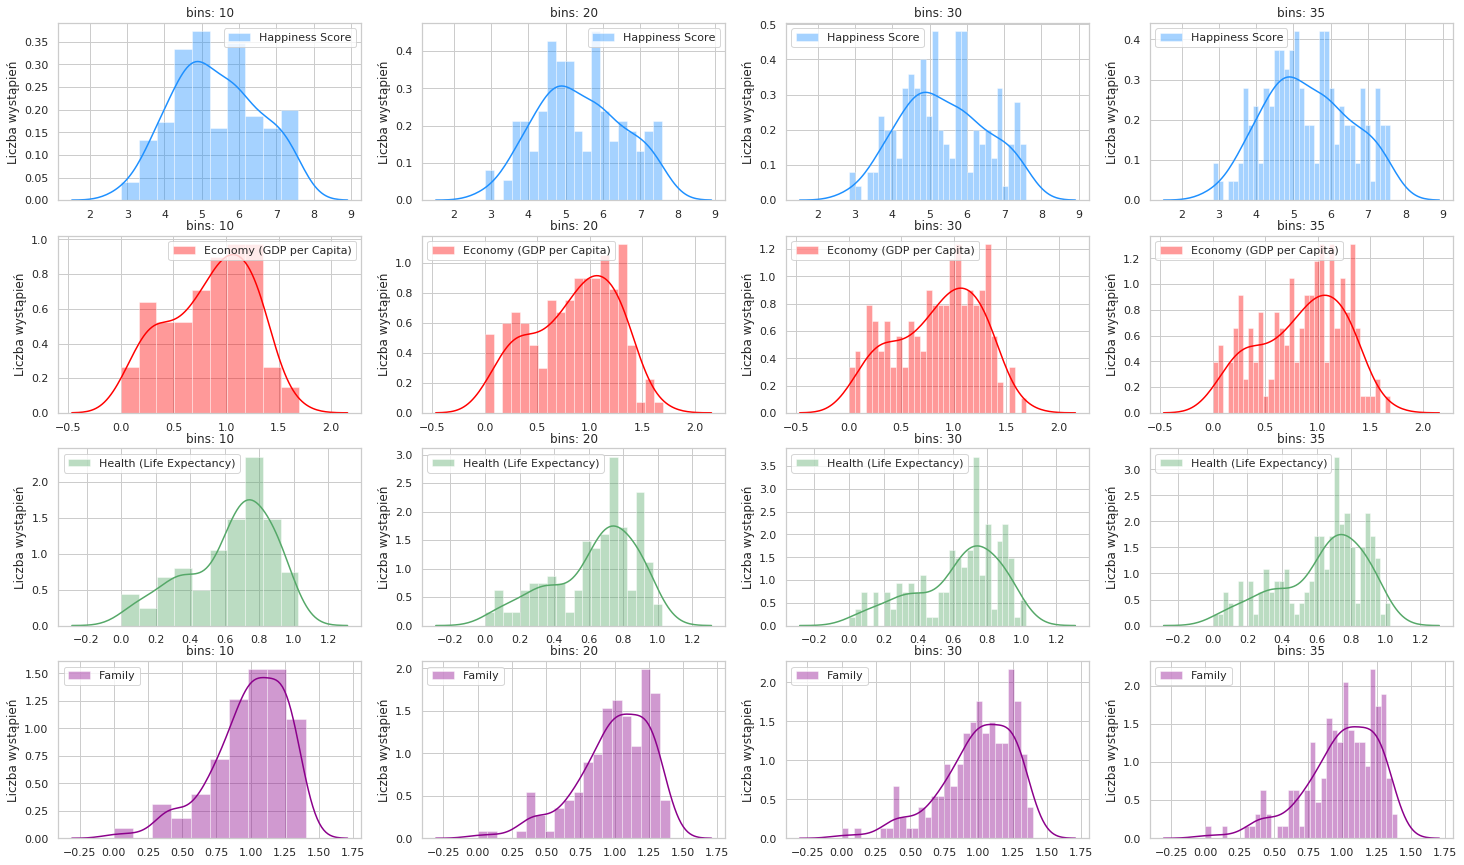

In [10]:
ValueList = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']
DistributionObj.addHistMatrix(ValueList)

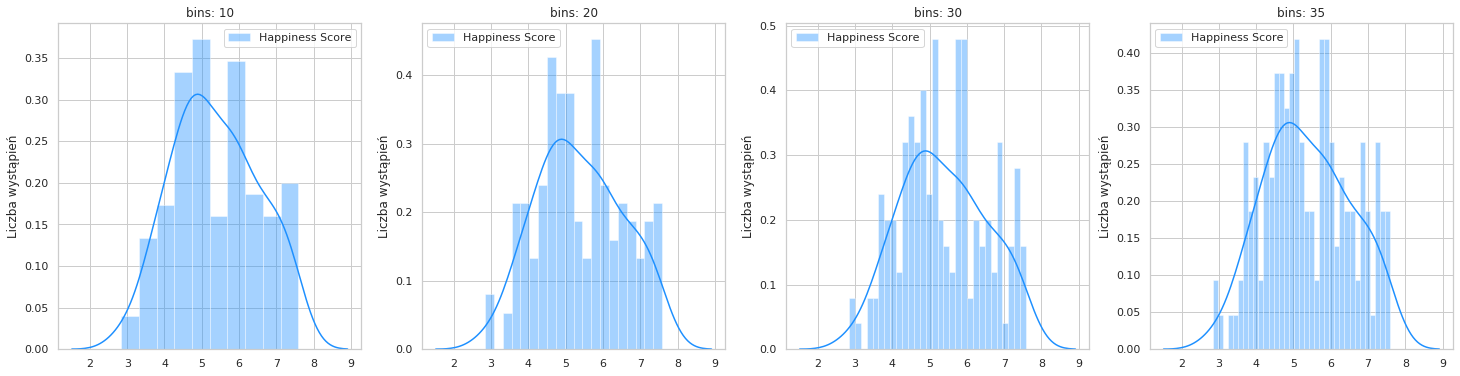

In [11]:
Value = 'Happiness Score'
DistributionObj.addHistMatrix(Value)

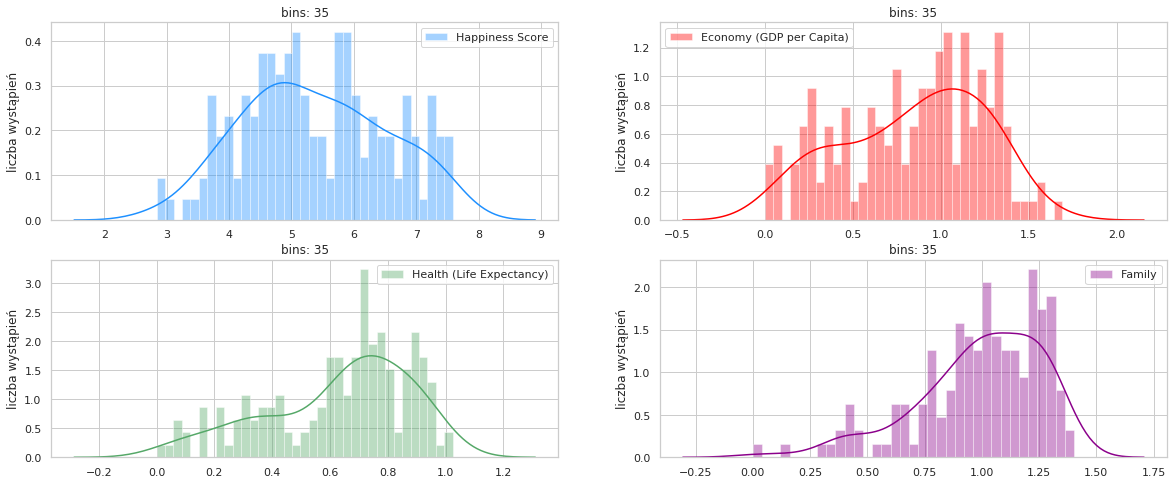

In [12]:
DistributionObj.addHist(ValueList)

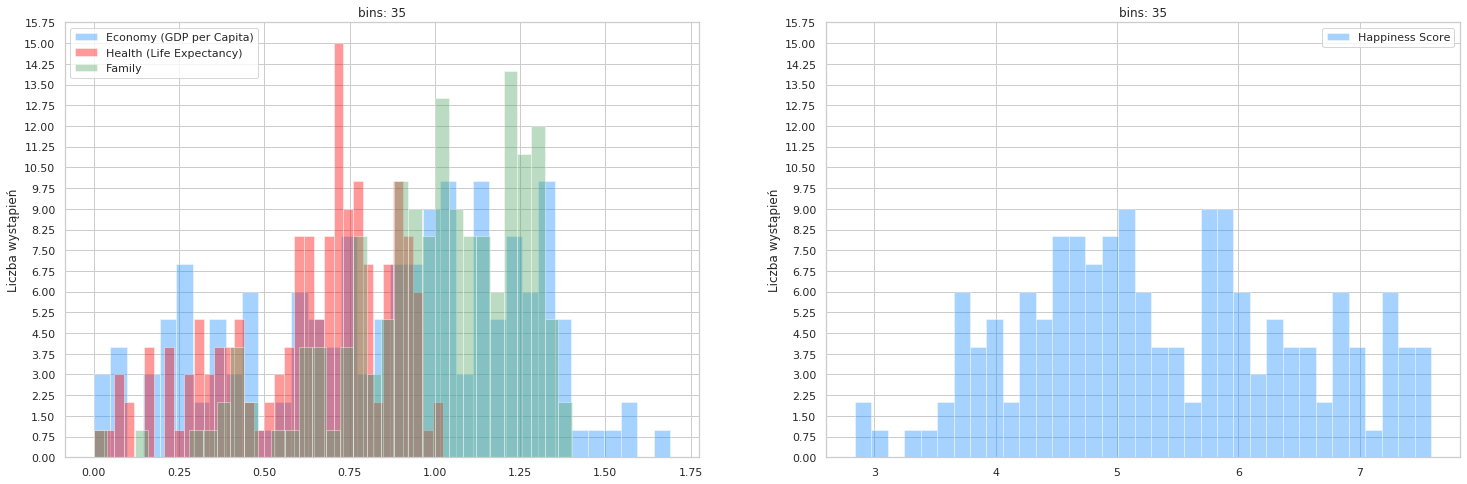

In [13]:
DistributionObj.addStackedHist(ValueList)

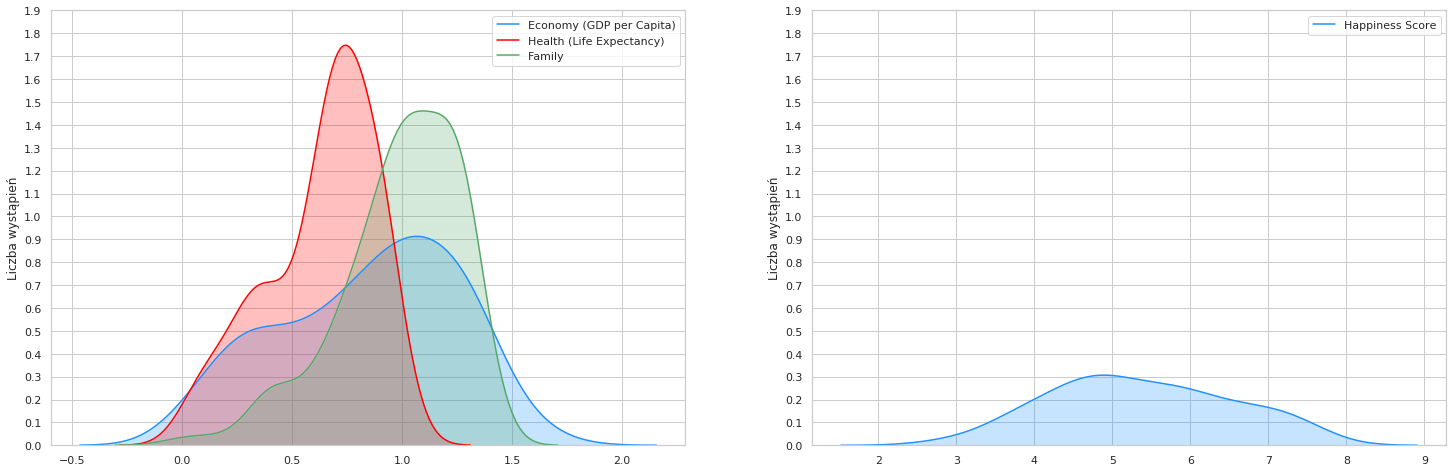

In [14]:
DistributionObj.addDensityDistribution(ValueList)

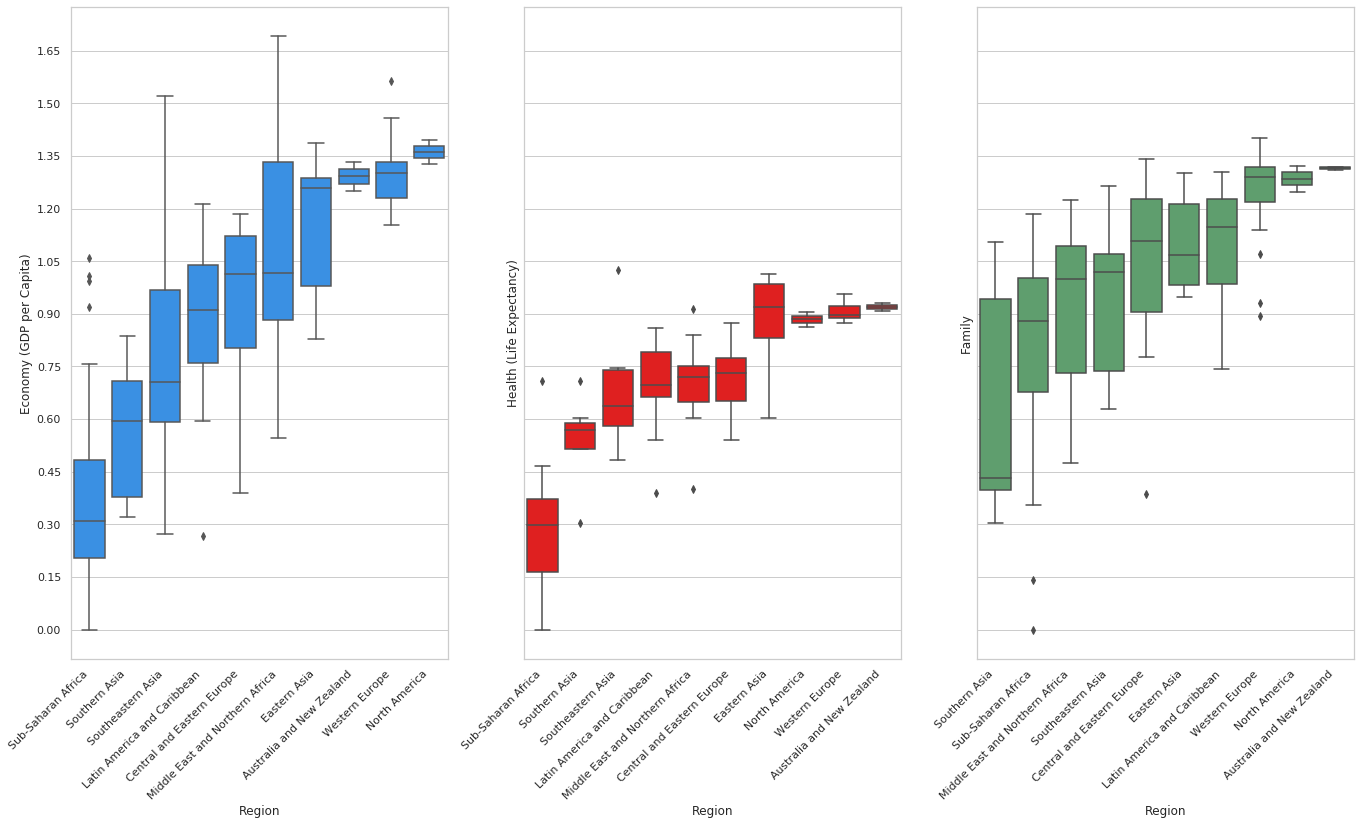

In [15]:
DistributionObj.addBoxPlot(ValueList)

In [16]:
rank1 = happiness2015.groupby("Region")['Economy (GDP per Capita)'].mean().sort_values().index
rank2 = happiness2015.groupby("Region")['Health (Life Expectancy)'].mean().sort_values().index
rank3 = happiness2015.groupby("Region")['Family'].mean().sort_values().index
print(rank1)
print()
print(rank2)

print()

print(rank3)

Index(['Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia',
       'Latin America and Caribbean', 'Central and Eastern Europe',
       'Middle East and Northern Africa', 'Eastern Asia',
       'Australia and New Zealand', 'Western Europe', 'North America'],
      dtype='object', name='Region')

Index(['Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'North America',
       'Western Europe', 'Australia and New Zealand'],
      dtype='object', name='Region')

Index(['Southern Asia', 'Sub-Saharan Africa',
       'Middle East and Northern Africa', 'Southeastern Asia',
       'Central and Eastern Europe', 'Eastern Asia',
       'Latin America and Caribbean', 'Western Europe', 'North America',
       'Australia and New Zealand'],
      dtype='object', name='Region')


In [0]:
class Correlation:
    '''Correlation - class where correlation plots are stored
    '''
    def __init__(self, dataset):
      self.dataset = dataset
      self.x_data = []
      self.y_data = []
      self.step = 0
      self.size = ''
      sns.set(style='whitegrid', color_codes=True)

    @property
    def addCorrelationmap(self):
      '''addCorrelationmap - Adding correlation heatmap from data frame'''
      corr= self.dataset.corr()
      g = plt.figure(figsize=(8,6))
      g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidth=.03)
      g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )

    def addScatterPlot(self, x_data, y_data,  step):
      '''addScatterPlot - Adding scatter plot
         x_data - set data for x axis,
         y_data - set data for y axis,
         step - set step for axis x and y
      '''    
      plt.figure(figsize=(12,8))
      g = sns.scatterplot(x=x_data, y=y_data, data=self.dataset)
      g.set_xticks(np.arange(0, (self.dataset[x_data].max()+step), step=step))
      g.set_yticks(np.arange(0, (self.dataset[y_data].max()+step), step=step))
        
    def addBubbleplot(self, x_data, y_data, step, size, hue_set=False):
      '''addBubbleplot - Adding scatter plot with specific size of dots
         x_data - set data for x axis,
         y_data - set data for y axis,
         step - set step for axis x and y,
         size - set size of dots, choose column name from data frame, 
         hue_set - set hue of dots, choose column name from data frame, 
      ''' 
      plt.figure(figsize=(18, 13))
      g = sns.scatterplot(x=x_data, y=y_data, s=(self.dataset[size]**3.5), hue=hue_set, data=self.dataset, alpha=0.8)
      g.set_xticks(np.arange(0, (self.dataset[x_data].max()+step), step=step))
      g.set_yticks(np.arange(0, (self.dataset[y_data].max()+step), step=step))
      plt.show()

    def addHexbinplot(self, x_data, y_data):
      '''addHexbinplot - Adding hexbin plot with specific size of dots
         x_data - set data for x axis,
         y_data - set data for y axis
      '''
      plt.figure(figsize=(8,6))
      g =sns.jointplot(x=x_data, y=y_data, data=self.dataset, height=8, ratio=4)
      plt.show()      

In [0]:
CorrelationObj = Correlation(dataset=happiness2015)

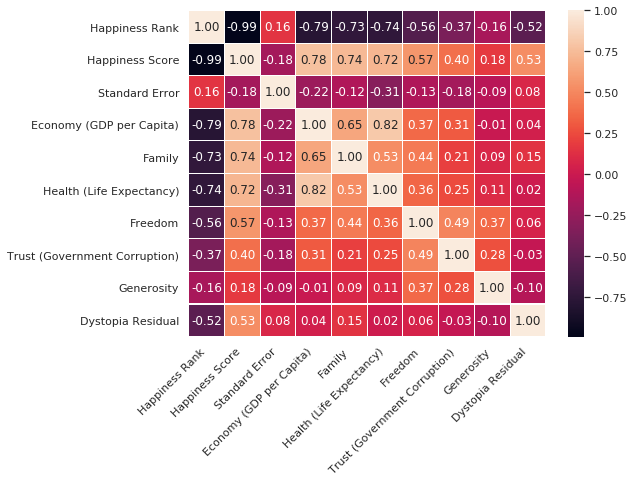

In [19]:
CorrelationObj.addCorrelationmap

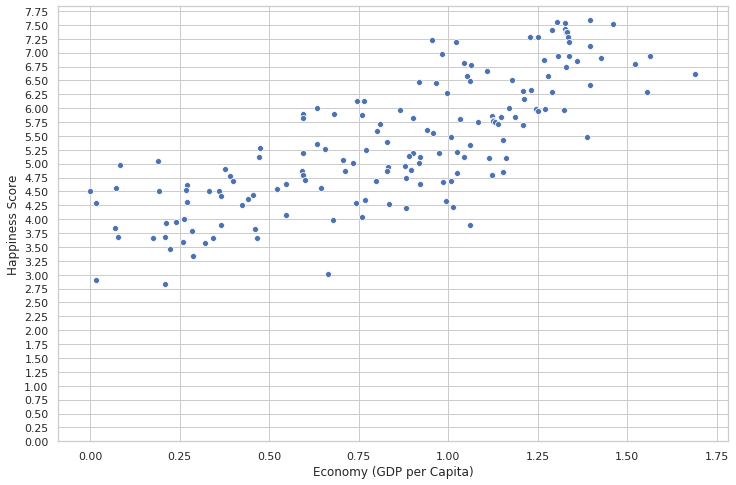

In [20]:
CorrelationObj.addScatterPlot(x_data='Economy (GDP per Capita)', y_data='Happiness Score', step=0.25)

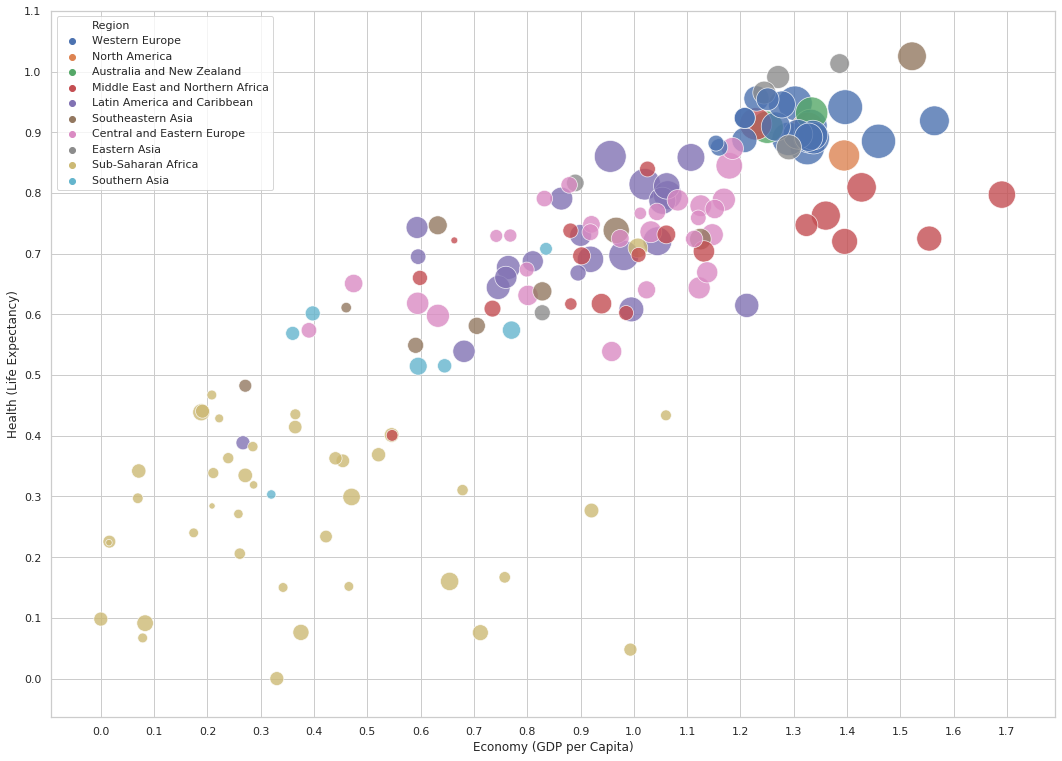

In [21]:
CorrelationObj.addBubbleplot(x_data='Economy (GDP per Capita)', y_data='Health (Life Expectancy)', size='Happiness Score', hue_set='Region', step=0.1)

<Figure size 576x432 with 0 Axes>

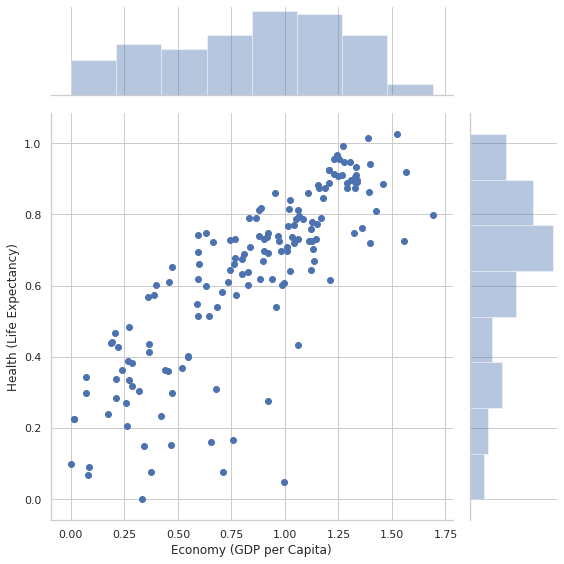

In [22]:
CorrelationObj.addHexbinplot(x_data='Economy (GDP per Capita)', y_data='Health (Life Expectancy)')

In [0]:
happiness2015.reset_index()
# Choosing variable to be predicted
y = happiness2015['Happiness Score'].values.reshape(-1,1)

# feature included in model
X = happiness2015['Economy (GDP per Capita)'].values.reshape(-1,1)

In [0]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# Train Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

# Predict Results
y_pred = lin_reg.predict(X_test)

print('PREDICTED VALUES (UNSCALED):\n {}'.format(y_pred[:5]))

PREDICTED VALUES (UNSCALED):
 [[4.0491001 ]
 [6.28299925]
 [5.41385101]
 [3.47751904]
 [3.86449493]]


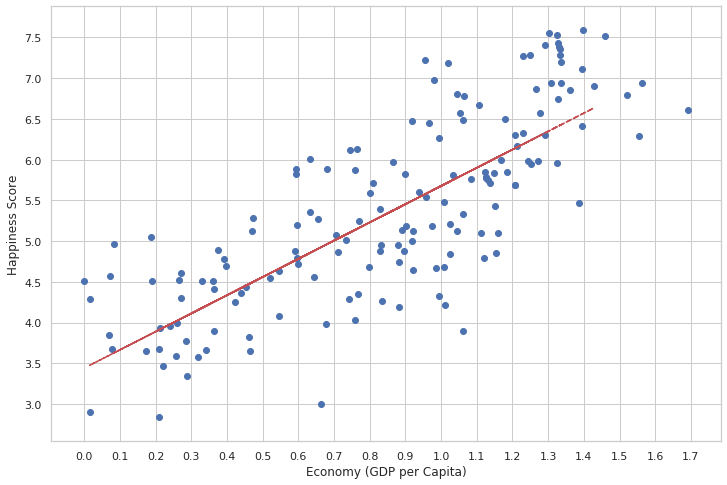

In [26]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0, 8, step=0.5))
plt.xticks(np.arange(0, 1.8, step=0.1))

plt.scatter(X, y)
plt.plot(X_test, y_pred, c="r", ls="--")
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

plt.show()

In [27]:
# Measure Accuracy
from sklearn.metrics import mean_squared_error
accuracy = mean_squared_error(y_test, y_pred) # Mean Squared Error
print('ACCURACY(MSE):\n{}%'.format(round(accuracy*100,2)))

ACCURACY(MSE):
50.8%
